### 표준 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터셋 정보
https://grouplens.org/datasets/movielens
### rating
- user_id
- movie_id
- rating
- time

### movie
- movie_id
- title
- genre

### user
- user_id
- gender
- age
- accupation(개인정보-직업)
- zipcode(개인정보-주소)

### Etc
- 각 데이터는 '::'구분자를 사용하여 열을 구문하였다.

### 데이터 로딩

In [2]:
# csv 파일이 아닌 data 파일 그래서 변환 작업
rating_data = pd.io.parsers.read_csv("D:/Python3/data/ml-1m/ratings.dat",
                                     names = ['user_id','movie_id','rating','time'],
                                    delimiter = '::') # delimiter 종결자

movie_data = pd.io.parsers.read_csv('D:/python3/data/ml-1m/movies.dat', 
                                    names = ['movie_id', 'title', 'genre'],
                                    delimiter = '::')

user_data = pd.io.parsers.read_csv('D:/python3/data/ml-1m/users.dat', 
                                    names = ['user_id', 'gender', 'age', 'accupation', 'zipcode'],
                                    delimiter = '::')

In [3]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
user_data.head()

,user_id,gender,age,accupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
accupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
rating_data.isnull().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [10]:
user_data.isnull().sum()

user_id       0
gender        0
age           0
accupation    0
zipcode       0
dtype: int64

In [11]:
movie_data.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

### 탐색적 데이터 분석

In [12]:
# 총 영화의 개수 ( unique() : 범주형 데이터 일 때 사용 )
len(movie_data['movie_id'].unique())

3883

In [13]:
# 연도별 영화의 개수를 이용해서 가장 많은 영화가 출시된 년도 Top 10

# len(movie_data['title'][-5:-1])
# 파생변수
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])

# 수치형 데이터 개별요소와 건수 value_counts()
movie_data['year'].value_counts().head(10)    

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [14]:
# 연대별 영화와 개수 추출
# 1900, 1910, 1920 .... 년대별로 끊어서 출력
# 파생변수 : movie_t
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2] +'0')
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

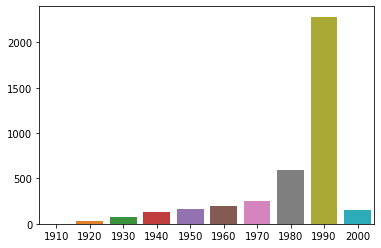

In [15]:
# 시각화
sns.barplot(movie_year_term.index, movie_year_term.values)
plt.show()

In [16]:
# 영화데이터에서 가장 많이 등장하는 장르는 무엇일까?
# 코미디|드라마|액션 => 구분자
# dict => key:value
unique_genre_dict = {}
#                        iterrows() : 행단위로 처리 (행전체를 가지고 옴.)    
for index, row in movie_data.iterrows():
    # genre 피처의 구분자를 분리
    genre_combination = row['genre']
    p = genre_combination.split('|') #리스트 타입
    
    for genre in p:
        if genre in unique_genre_dict: # 장르가 있다면
            unique_genre_dict[genre] += 1
        else:                          # 없다면
            unique_genre_dict[genre] = 1
        
unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

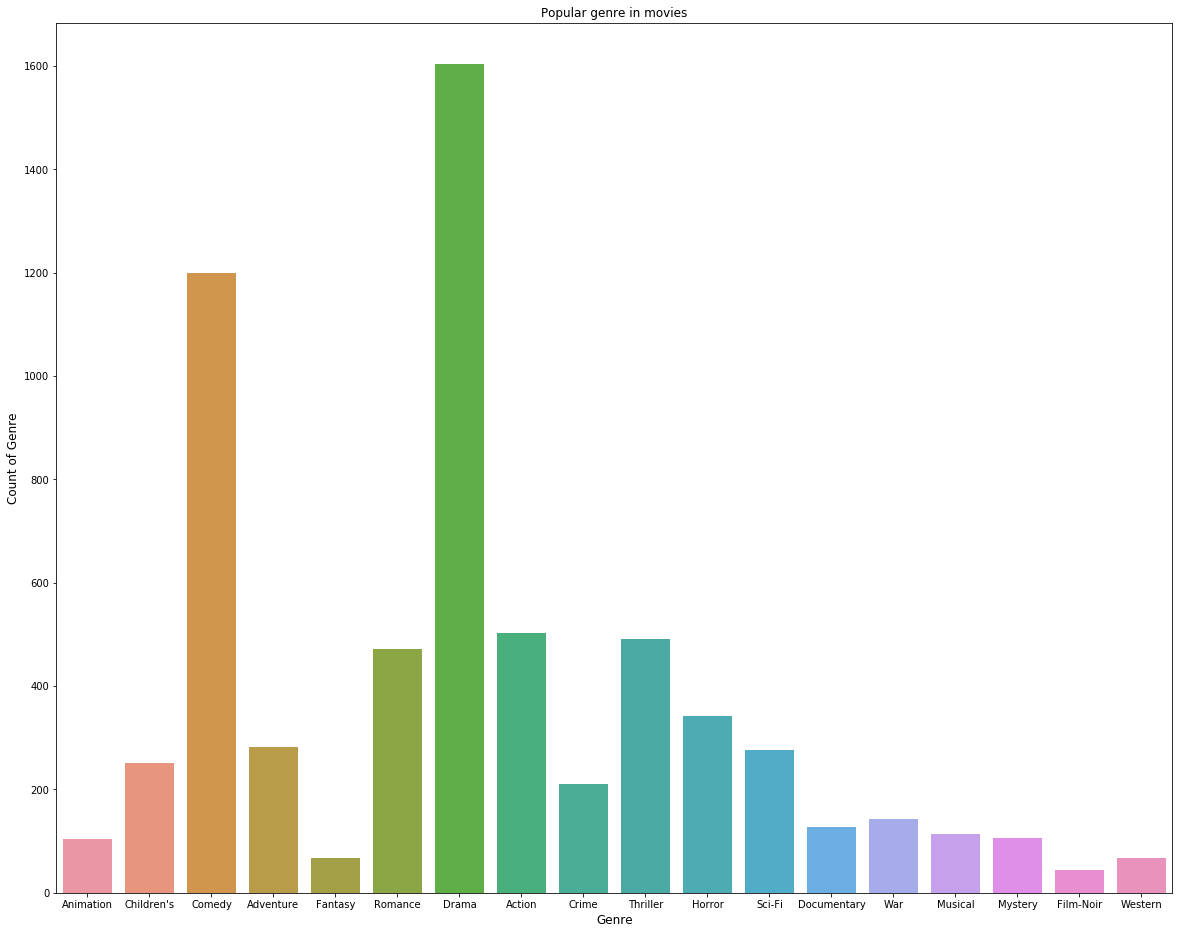

In [17]:
plt.rcParams['figure.figsize'] = [20, 16]

# 시각화 -> 리스트 타입
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()))

plt.title('Popular genre in movies')
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Count of Genre', fontsize = 12)
plt.show()

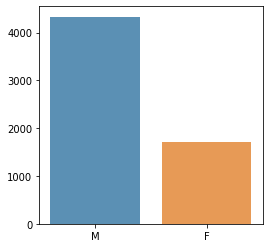

In [18]:
# 사용자의 성별과 사용자의 연령대
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
#user_gender
sns.barplot(user_gender.index, user_gender.values, alpha= 0.8)
plt.show()

In [19]:
# 연령대 시각화
plt.rcParams['figure.figsize'] = [4, 4]
user_ages = user_data['age'].value_counts()
user_ages

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [20]:
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0]+'0'

user_data['ages'] = user_data['age'].apply(lambda x:age_classification(x))
user_ages = user_data['ages'].value_counts()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

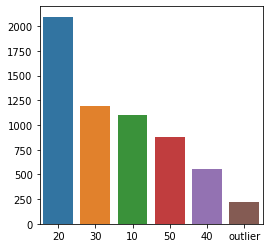

In [43]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(user_ages.index, user_ages.values)
plt.show()

In [44]:
# 사용자의 수
len(user_data['user_id'].unique())

6040

In [45]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
time        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [41]:
# 각 영화의 평점 횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count()
movie_rate_count.head()

movie_id
1    2077
2     701
3     478
4     170
5     296
Name: rating, dtype: int64

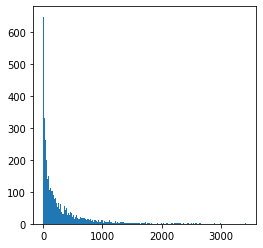

In [22]:
fig = plt.hist(movie_rate_count.values, bins = 200)
plt.show()

In [23]:
print('총 영화수 : ',len(movie_data['movie_id'].unique()))

총 영화수 :  3883


In [24]:
print('100개 미만의 평가를 받은 영화 수 : ', 
      len(movie_rate_count[movie_rate_count < 100]))

100개 미만의 평가를 받은 영화 수 :  1687


In [42]:
# 각 영화의 평균 평점을 추출
# 각 영화당 평점건수와 평균값을 추출하시오.
# agg() : 여러 함수를 반복하여 처리
#                                                                             칼럼명    : 칼럼값
movie_groupby_rating_info = rating_data.groupby('movie_id')['rating'].agg({'rated_count':'count', 'rated_mean':'mean'})
movie_groupby_rating_info.head()

,rated_count,rated_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


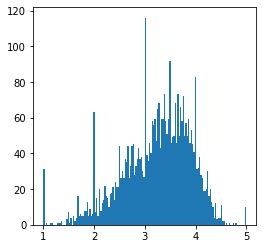

In [47]:
movie_groupby_rating_info['rated_mean'].hist(bins = 150, grid= False)

In [27]:
# 유저별로 평가한 영화 개수 ( 유저별로 시청한 영화 개수 )
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rating_count', 'rating_mean', 'raing_std']
user_grouped_rating_info.head()

,rating_count,rating_mean,raing_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


In [28]:
# 유저별로 평가한 평균 영화의 평점

In [29]:
# 유저별로 평가한 영화 점수의 편차

In [30]:
# 100년 이상 평가 받은 영화중 평점이 높은 Top 10의 영화 출력
merged_data = movie_groupby_rating_info.merge(movie_data, on = ['movie_id'], 
                                             how = 'left')
merged_data.head()

,movie_id,rated_count,rated_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990


In [31]:
# nlargest(n, 값피처) : 가장 큰 값을 n번째 까지 구해주는 함수
merged_data[merged_data['rated_count'] > 100][['rated_mean',
                                               'title']].nlargest(10, 'rated_mean')

,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 영화 평점 예측 - 추천시스템 알고리즘
- 이미지, 영상 인식
- 소리 인식
- 사기방지
- 이상감지
- 침입탐지
- 환자진단
- 재고 최적화 
- 수요 예측
- 추천시스템 : 
        CF(상품 기반 추천) - 협업 필터링 => 행렬에 비어 있는 곳을 채우는 것을 SVD 라고 함.
            
           : 많은 사용자들로부터 얻은 기호정보(taste information)에 따라 사용자들의 관심사들을 자동적으로 예측하게 해주는 방법
        
        CB(내용기반 추천) :
        
        KB(지식기반 추천)

In [32]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
# 표 형태 table(어떤 관객이 어떤영화를 보았는지를 알 수 있음) => SVD 핵심
#                                                                        상위인덱스 하위인덱스    행  열  
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
#                                                                         위치 바뀌어도 상관X
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

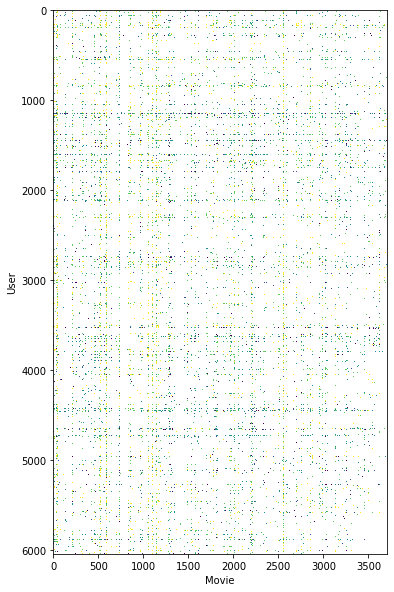

In [34]:
# 비어 있는 것이 있다(하얀부분) -> 아직 보지 못하 영화가 있음.
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.show()

### SVD를 활용한 추천시스템
- 환경설정
     아나콘다 모두 종료 후 anaconda powersheel prompt 관리자 실행
        세가지 중 하나 선택 실행 ( 3번째 추천 )
        pip install surprise
        pip install scikit-surprise
        conda install -c conda-forge scikit-surprise
        http://surpriselib.com/
        https://stackoverflow.com/
        https://antilibrary.org/2086

In [35]:
# Dataset : 행렬로 만드는 것, Reader : 채워나가야 할 값들, accuracy : 정확도
from surprise import SVD, Dataset, Reader, accuracy
# surprise 모델도 머신러닝중 일부분.
from surprise.model_selection import train_test_split

np.set_printoptions(suppress = True) # 부동 소수점 숫자를 인쇄

reader = Reader(rating_scale = (1, 5)) # 1 ~ 5 숫자로 만들어라

In [48]:
# 데이터 프레임 생성
ratings_dict = {'item_id':[1, 2, 3, 1, 2, 3, 2],
               'user_id':['a', 'a', 'a', 'b', 'b', 'b', 'c'],
               'rating':[2, 4, 4, 2, 5, 4, 5]}
df = pd.DataFrame(ratings_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [50]:
# 데이터 프레임을 행렬로 변환하여 확인 (평점이 있는지 없는지 혹은 몇점인지)
df_matrix_table= df[['user_id', 'item_id', 'rating']].set_index(['user_id', 'item_id']).unstack()
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          NaN  5.0  NaN

In [53]:
# SVD 행렬 사용을 위한 데이터 셋을 생성 ( 실질로 SVD 이용 할때 )
data = Dataset.load_from_df(df = df[['user_id', 'item_id', 'rating']],
                           reader = reader)
train_data = data.build_full_trainset()

In [56]:
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.002, n_epochs = 10)

model.fit(train_data)

In [57]:
# 빈공간에 점수 예측
# build_anti_testset() -> 일부분만 채우기, 비교 : build_full_trainset()
# 학습에 사용된 matrix에 0으로 평가되어 있는 부분의 데이터
# user 혹은 item
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

for _, iid, _, predicted_rating , _ in predictions:
    print('Item_id', iid, " : ", 'predicted_rating : ', predicted_rating)

Item_id 1  :  predicted_rating :  3.6286700103686367
Item_id 3  :  predicted_rating :  3.7833180973980505


In [ ]:
# fit : 예측 모델 생성 
# predict() : 예측하는 함수 (특정 지정만 이용해서 예측)
# test() : 예측하는 함수 (모든 test를 이용해서 예측)

In [58]:
# 학습 데이터 
reader = Reader(rating_scale = (1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset() # 전체다 채우기 비교 : build_anti_testset()

In [59]:
# SVD 모델 학습
import time
train_start = time.time()
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.002, n_epochs = 100)

model.fit(train_data)
train_end = time.time()
train_end - train_start

77.41274809837341

In [60]:
# 영화의 평점을 예측할 타겟이 되는 유저 ( 4번 유저 )
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [61]:
target_user_movie_rating_dict = {}
#                                   행 단위 씩 읽어오기
for index, row in  target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
target_user_movie_rating_dict                                                

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [64]:
# 4번 유저가 보지 않은 영화들 중 예상 평점이 높은 영화 10개 추출
test_data = []

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating)) # 자료형으로 담아야 해서 튜플로 담는다.    

In [67]:
# 타켓 유저(4번)의 평점 점수를 예측
target_user_predictions = model.test(test_data)

In [68]:
# 예측된 점수 중에서 타켓 유저의 영화별 점수를 target_user_movie_predict_dict = {}

def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:              # uid = user_id
            if mid not in user_history: # mid = movie_id
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
    
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            user_id = target_user_id,
                                                            user_history = target_user_movie_rating_dict)

In [71]:
# target_user_movie_predict_dict 예측된 점수를 이용해서 타켓 유저에게 Top 10영화를 추천
import operator
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                    key = operator.itemgetter(1),
                                    reverse = True)[:10]
# operator.itemgetter(1) : 1번째 아이템을 가져와라.

In [72]:
target_user_top10_predicted

[(50, 5),
 (58, 5),
 (111, 5),
 (199, 5),
 (214, 5),
 (246, 5),
 (290, 5),
 (306, 5),
 (308, 5),
 (326, 5)]

In [73]:
# 영화 타이틀 정보를 포함해서 출력
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
    
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], " : ", predicted_rating)

Usual Suspects, The (1995)  :  5
Postino, Il (The Postman) (1994)  :  5
Taxi Driver (1976)  :  5
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)  :  5
Before the Rain (Pred dozhdot) (1994)  :  5
Hoop Dreams (1994)  :  5
Once Were Warriors (1994)  :  5
Three Colors: Red (1994)  :  5
Three Colors: White (1994)  :  5
To Live (Huozhe) (1994)  :  5


### 예측 모델의 평가
- RMSE

In [74]:
reader = Reader(rating_scale = (1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size= 0.2)

# SVD 모델 
train_start = time.time()
#           하이퍼 파리미터 값 (고정 값이 아니다.) -> 디폴트 값, 가이드라인 다 있음.
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.002, n_epochs = 100)
#          하이퍼 파라미터 : 함수 들어가야 하는 것, 권장값
#          하이퍼 파라미터 튜닝 : 파라미터를 몇개씩 넣어서 모델 성능 향상 
#          파라미터 : 함수에 들어가야 하는 것, 고정값 

model.fit(train_data)
train_end = time.time()
print('training time of model : %.2f second' %(train_end - train_start))

# 예측
predictions = model.test(test_data)

# test_data의 RMSE 점수 출력
print('RMSE of test dataset is SVD model :')
accuracy.rmse(predictions)

training time of model : 74.33 second
RMSE of test dataset is SVD model :
RMSE: 0.8682


0.8682031008141585

- RMSE 평가는 예측값과 실제값의 차이의 합을 나타내는 수치이기 때문에 작을  수록 좋은 모델을 뜻한다.

In [75]:
# 하이퍼 튜닝 하는 방법.
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.002, n_epochs = 100)
    model.fit(train_data)
    train_end = time.time()
    print('training time of model : %.2f second' %(train_end - train_start))
    print('RMSE of test dataset is SVD model.n.factors =  : '+str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print('---------------------------------------------------')

print('searching n_factors is finish')

training time of model : 73.14 second
RMSE of test dataset is SVD model.n.factors =  :1
RMSE: 0.8719
---------------------------------------------------
training time of model : 72.01 second
RMSE of test dataset is SVD model.n.factors =  :2
RMSE: 0.8710
---------------------------------------------------
training time of model : 71.69 second
RMSE of test dataset is SVD model.n.factors =  :3
RMSE: 0.8715
---------------------------------------------------
training time of model : 72.13 second
RMSE of test dataset is SVD model.n.factors =  :4
RMSE: 0.8720
---------------------------------------------------
training time of model : 72.74 second
RMSE of test dataset is SVD model.n.factors =  :5
RMSE: 0.8727
---------------------------------------------------
training time of model : 72.94 second
RMSE of test dataset is SVD model.n.factors =  :6
RMSE: 0.8725
---------------------------------------------------
training time of model : 73.15 second
RMSE of test dataset is SVD model.n.factors 

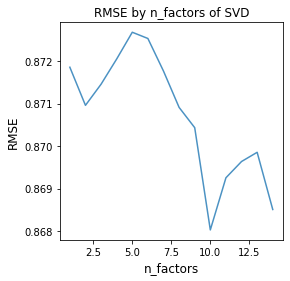

In [76]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha = 0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize = 12)
plt.xlabel('n_factors', fontsize = 12)
plt.show()

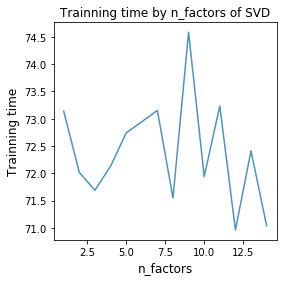

In [78]:
plt.plot(range(1, 15), ttime_list_by_factors, alpha = 0.8)
plt.title('Trainning time by n_factors of SVD')
plt.ylabel('Trainning time', fontsize = 12)
plt.xlabel('n_factors', fontsize = 12)
plt.show()